# Apply contrast to CXR images

In [1]:
import glob
import cv2
import os
import shutil
import matplotlib.pyplot as plt
from torchvision import transforms
from PIL import Image

## Load image paths

In [2]:
exts = ('png', 'jpg', 'jpeg', 'JPG')
img_paths = []
for ext in exts:
    img_paths.extend(glob.glob(f'CXR/*/*/*.{ext}'))

len(img_paths)

15537

## Simple test

In [3]:
def apply_contrast(img):
    img = Image.fromarray(img)
    return transforms.ColorJitter(contrast=(2.0, 2.5))(img)

In [4]:
def display_augmented_images(img1, img2):
    fig, subplots = plt.subplots(1, 2, figsize=(13, 6))
    axi1 = subplots.flat[0]
    axi2 = subplots.flat[1]
    
    axi1.imshow(img1)
    axi2.imshow(img2)
    axi1.set_title('original')
    axi2.set_title('contrast')

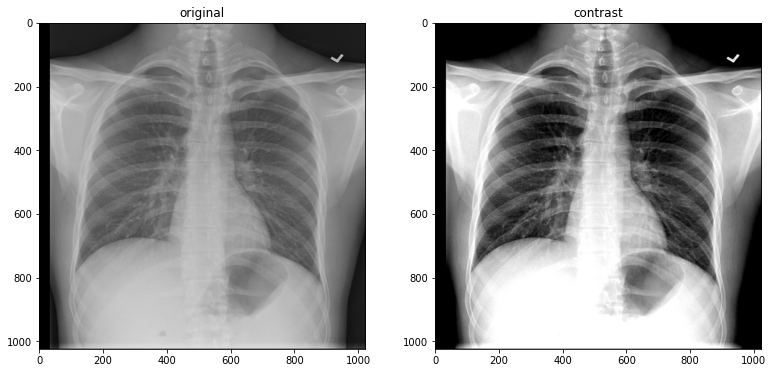

In [5]:
img = cv2.imread(img_paths[0])
img_with_con = apply_contrast(img)
display_augmented_images(img, img_with_con)

## Apply contrast to images and save images

In [6]:
base_tdir = 'CXR_with_contrast'
if os.path.isdir(base_tdir):
    shutil.rmtree(base_tdir)
    
dtypes = ('train', 'test')
cls_names = ('covid-19', 'pneumonia', 'normal')
for dtype in dtypes:
    for cls_name in cls_names:
        os.makedirs(f'{base_tdir}/{dtype}/{cls_name}')

In [7]:
def get_target_img_path(img_path, count):
    dtypes = ('train', 'test')
    cls_names = ('covid-19', 'pneumonia', 'normal')
    img_name = img_path.split('/')[-1]
    for dtype in dtypes:
        if dtype in img_path:
            for cls_name in cls_names:
                if cls_name in img_path:
                    count[dtype][cls_name] += 1
                    new_img_name = f'{dtype[:2]}_{cls_name}_{count[dtype][cls_name]}_{img_name}'
                    break
            break
            
    img_path = img_path.replace('CXR', 'CXR_with_contrast')
    img_path = img_path.replace(img_name, new_img_name)
    return img_path, count

In [8]:
count = {'train': {'covid-19': 0, 'pneumonia': 0, 'normal': 0},
         'test': {'covid-19': 0, 'pneumonia': 0, 'normal': 0}}
for i, img_path in enumerate(img_paths):
    img = cv2.imread(img_path)
    img_with_con = apply_contrast(img)
    
    t_img_path, count = get_target_img_path(img_path, count)
    img_with_con.save(t_img_path)
    
    if i % (len(img_paths)//10) == 0:
        print(f'{i / len(img_paths) * 100:.2f}% completed.')
        
    del img, img_with_con

0.00% completed.
10.00% completed.
19.99% completed.
29.99% completed.
39.98% completed.
49.98% completed.
59.97% completed.
69.97% completed.
79.96% completed.
89.96% completed.
99.95% completed.


## Change file names

In [21]:
# exts = ('png', 'jpg', 'jpeg', 'JPG')
# img_paths = []
# for ext in exts:
#     img_paths.extend(glob.glob(f'CXR_with_contrast/*/*/*.{ext}'))

# len(img_paths)

15537

In [22]:
# count = {'/tr_': {'covid': 0, 'pneumonia': 0, 'normal': 0},
#          '/te_': {'covid': 0, 'pneumonia': 0, 'normal': 0}}
# dtypes = ('/tr_', '/te_')
# cls_names = ('covid', 'pneumonia', 'normal')
# new_img_paths = []
# for img_path in img_paths:
#     for dtype in dtypes:
#         for cls_name in cls_names:
#             if dtype in img_path and cls_name in img_path:
#                 count[dtype][cls_name] += 1
#                 img_path = img_path.replace(dtype, f'{dtype}covid_{count[dtype][cls_name]}_')
#                 new_img_paths.append(img_path)